# How to do stuff in Jupyter-Books

## Images

### Data plotting

C:\Users\ashej\AppData\Local\Temp\ipykernel_53348\3474756099.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");


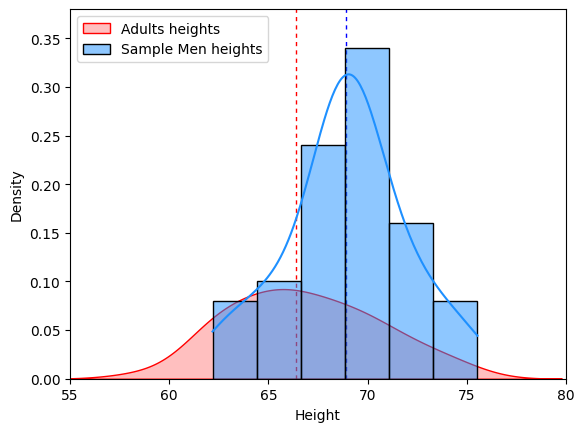

In [1]:
#required import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Machine Learning for Hackers, Drew Conway & John Myles-While, O'Reilly Media.
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)
df_sample = df.loc[df['Gender']== 'Male',['Gender','Height']].sample(50, random_state=12, ignore_index=True);
dfht = df[['Height']]

# Plot
pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std

fig, ax = plt.subplots();
sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");
sns.histplot(df_sample, x = 'Height', stat = 'probability', kde = True, color="dodgerblue", label="Sample Men heights",bins = 6); 

plt.axvline(x=68.929605, color='b', dashes=(3, 3), zorder=0,linewidth=1);
plt.axvline(x=66.367560, color='red', dashes=(3, 3), zorder=0,linewidth=1);
plt.xlim(55,80)
plt.ylim(0,.38)
plt.legend();

### Dataframe displays

In [2]:
#required import
import pandas as pd

##Machine Learning for Hackers, Drew Conway & John Myles-While, O'Reilly Media.
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)

In [3]:
##standard display. 
display(df)

#set degault max and options
df_sample = df.loc[df['Gender']== 'Male',['Gender','Height']].sample(50, random_state=12, ignore_index=True);
pd.set_option('display.max_rows', 30)
display(df_sample)

#set scoll options in metdata. only displays in html output

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


,Gender,Height
0,Male,63.651508
1,Male,72.390657
2,Male,69.008259
3,Male,71.357382
4,Male,70.490929
...,...,...
45,Male,73.847017
46,Male,69.624550
47,Male,69.481714
48,Male,67.459715


To display htmls outputs in scroll box, hidden box, etc., add metadata tags:

```html

    "tags": [
        "output_scroll",
        "hide_input"
    ]

```
    
Using Lab or Notebook metadata edit options

#### Display dataframes side by side

In [4]:
#required import
import pandas as pd
from IPython.display import display, display_html

url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)
dfht = df[['Height']]

#display stats side by side
df1_styler = df_sample.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Sample Heights of 50 Adult Males')
df2_styler = dfht.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Population of Adult Heights')
space = "\xa0" * 10 #adjusts spacing

display_html(df1_styler._repr_html_()+ space +df2_styler._repr_html_(), raw=True)

,Height
mean,68.929605
std,3.028708
,Height
mean,66.367560
std,3.847528


### Figures


#### Drawing Figures

#### using a function


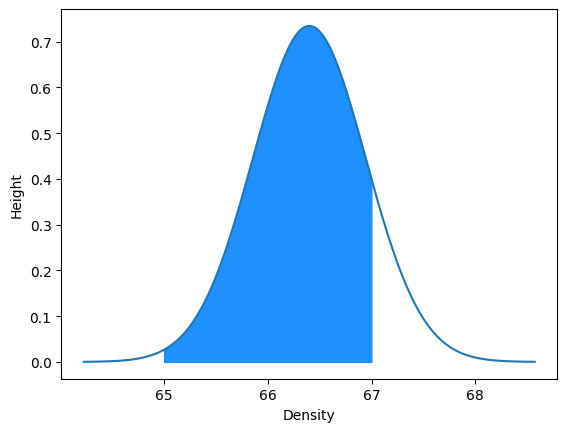

In [5]:
# %matplotlib notebook these lines have mysterious effect on layouts
# %matplotlib inline
from ipywidgets import interact, FloatSlider, interactive, fixed
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from scipy.stats import norm
import math
import numpy as np
import matplotlib.pyplot as plt
    
#draws pdf of smampling means)
def draw_pdf_smeans(mu, sigma, sample_size, lower_cond, upper_cond):
    sigma_n = sigma/(math.sqrt(sample_size))
    # sigma_n = 1
    x = np.linspace(-4*sigma_n + mu, 4*sigma_n + mu, 1000)
    y = norm.pdf(x, mu, sigma_n) # (x-values, location, scale) 
    # pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std
    # z = x['x<67']
    # print(z)
    plt.xlabel('Density')
    plt.ylabel('Height')
    plt.plot(x, y)
    plt.fill_between(x, y, 0, where = (x > lower_cond) & (x < upper_cond),color = 'dodgerblue')
    plt.show()

draw_pdf_smeans(66.4, 3.84, 50, 65, 67)

#### Interactive Figures

Sliders

In [6]:
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

def plot_oscillation(wavelength, magnitude, phase):
    x = np.linspace(-20, 20, 1000)
    plt.plot(x, magnitude*np.sin((x+phase)/(wavelength/(2*np.pi))))
    plt.show()
    
w = dict(wavelength = FloatSlider(2*np.pi, min=0.1, max=20, step=0.1, description='wavelength'),
         magnitude = FloatSlider(1, min=0.1, max=10, step=0.1, description='magnitude'),
         phase = FloatSlider(0, min=0, max=10, step=0.1, description='phase'))

output = interactive_output(plot_oscillation, w)
box = HBox([VBox([*w.values()]), output])
display(box)

The above will display the sliders, but not the image in html. To fix this see the example below where boxes are also used to place the slider widget. Note, in html the widget will appear -but not change the graph without a python kernel. 

In [7]:
from ipywidgets import interact, FloatSlider, interactive, fixed
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

#imports
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
# import ipywidgets as widgets
from IPython.display import display, display_html
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import markdown
from IPython.core.display import display, HTML
from myst_nb import glue

out = Output()

mu = 66.4
sigma = 3.84
sample_size = 50,
upper_cond= 66.4+4*3.84

#draws pdf of smampling means)
def update_plot(change):
    lower_cond = change['new'] # new slider value 
    mu = 66.4
    sigma = 3.84
    sample_size = 50.0,
    upper_cond= 66.4+4*3.84
    sigma_n = sigma/(np.sqrt(sample_size)[0]) #std dev of sampling means
    with out:
        clear_output(wait=True)
        x = np.linspace(-4*sigma_n + mu, 4*sigma_n + mu, 1000) #x-axis values
        y = norm.pdf(x, mu, sigma_n) # (x-values, location, scale) #norm function
        #plot
        fig, axs = plt.subplots()
        plt.plot(x, y)
        plt.fill_between(x, y, 0, where = (x > lower_cond) & (x < upper_cond),color = 'pink')
        plt.axvline(x=66.4, color='red', dashes=(3, 3), zorder=0,linewidth=1)
        plt.axvline(x=lower_cond, color='blue', dashes=(3, 3), zorder=0,linewidth=1)
        plt.xlabel('Density')
        plt.ylabel('Height')
        plt.text(lower_cond+.1,.6, r'$\bar{}=${}'.format(r'x',round(lower_cond,2)), fontsize=12)
        prob = 1-norm.cdf(lower_cond, loc=mu, scale=sigma_n)
        plt.text(67.5,.3, r'prob.={}'.format(round(prob,3)), fontsize=12)
        ##arrows
        style="Simple,head_length=15,head_width=15,tail_width=3"
        arrow = arrow = mpatches.FancyArrowPatch((68,.275), ((lower_cond+68)/2,
                                                 norm.pdf((lower_cond+68.75)/2, mu, sigma_n)/2),
                                                 arrowstyle=style)
        plt.gca().add_patch(arrow)
#       display(fig)
        plt.show()


style ={'description_width': 'initial'};

interact_layout = Layout(display='flex',
#                     flex_flow='column', #default for VBox
                    align_items = 'center',
#                     align_content = 'center',
                    justify_content = 'center',
#                     border = 'solid', #centers widget
                    )

slider = FloatSlider(description='Sample mean', 
                                style = style,
                                min=64.5, max=68.5, 
                                step = .5, value=67,
#                                 layout = slider_layout
                                )

slider_box = Box([slider] , layout = interact_layout) 
fig_box = Box([out] , layout = interact_layout) 
slider.observe(update_plot, 'value')
update_plot({'new': slider.value}) 
fig_and_slider = VBox(children = [slider_box, fig_box], layout=interact_layout)

display(fig_and_slider)

ModuleNotFoundError: No module named 'markdown'

A graph with slider on the side using bqplot


In [ ]:
import numpy as np
from bqplot import pyplot as plt
from IPython.display import display
from ipywidgets import interactive, fixed, IntSlider, HBox, Layout
%matplotlib inline

plt.figure(min_aspect_ratio=1, max_aspect_ratio=1)

xs = np.random.randint(0, 5000 + 1, 100)
ys = np.random.randint(0, 5000 + 1, 100)

scat = plt.scatter(xs, ys)

def rotate(theta, xs, ys):
    new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
    new_xs -= new_xs.min()
    new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
    new_ys -= new_ys.min()
    return new_xs, new_ys

def update_plot(theta, xs, ys):
    new_xs, new_ys = rotate(theta, xs, ys)
    scat.x, scat.y = new_xs, new_ys

w = interactive(update_plot, 
             theta=IntSlider(min=-180, max=180, step=5,value=0, orientation='vertical'), 
             xs=fixed(xs), 
             ys=fixed(ys))

box_layout = Layout(display='flex', flex_flow='row', justify_content='center', align_items='center')
display(HBox([plt.current_figure(), w], layout=box_layout))

#### Figure Layout

We can use flexboxes for more control

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
import markdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)
df_sample = df.loc[df['Gender']== 'Male',['Gender','Height']].sample(50, random_state=12, ignore_index=True);
df_sample
dfht = df[['Height']]
      
# Plot
pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std
out1 = Output()
df1 = Output()
df2 = Output()
cap = Output()

with df1:
    display(df_sample.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Sample Heights of 50 Adult Males'))

with df2: 
    display(dfht.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Population of Adult Heights'))
    
with out1:
    fig, ax = plt.subplots();
    sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");
    sns.histplot(df_sample, x = 'Height', stat = 'probability', kde = True, color="dodgerblue", label="Sample Men heights",bins = 6); 
    plt.axvline(x=68.929605, color='b', dashes=(3, 3), zorder=0,linewidth=1);
    plt.axvline(x=66.367560, color='red', dashes=(3, 3), zorder=0,linewidth=1);
    plt.xlim(55,80)
    plt.ylim(0,.38)
    plt.legend()
    plt.show()

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items = 'center',
                    justify_content = 'center',
                    border='solid',
                    width='100%')
#border solid might help visualize layout

box_images = Box(children = [df1, df2, out1],layout=box_layout)
box_images

But gluing doesn't work with boxes

In [ ]:
from myst_nb import glue
glue('box-images', box_images, display = False) 

```{glue:figure} box-images
:figwidth: 300px
:name: box-images
Gluing doesn't work with these flex boxes.
```

Another example

In [ ]:
#Simulate some data and bootstrap the mean of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
import markdown
from IPython.core.display import display, HTML

%matplotlib inline

# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")
plt.show()

fig1 = Output()
cap = Output()

with fig1:
    fig, ax = plt.subplots()
    ax.hist(means)
    for ln in [clo, chi]:
        ax.axvline(ln, ls='--', c='r')
    ax.set_title("Bootstrap distribution and 95% CI")
    plt.show()

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items = 'center',
                    justify_content = 'center',
                    border='solid',
                    width='100%')

box_images = Box(children = [fig1,fig1],layout=box_layout)
box_images

Note, this generates twice in Notebooks

#### Captioning

##### Captioning Hack
This is a hack. Adding captions to saved images seems easy, but labeling, indexing, and captioning generated and Boxed images does not seem to be yet supported. Add the following as **Markdown** below the figure:

```{figure} data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
:figclass: caption-hack
:name: your-fig-name

Your caption goes here
```

Add the following to the CSS file. For Jupyter-books, it should be added to "bookfolder/_static/css_file.css" The Css mode is necessary to center the image output so it aligns with the captioning. This is not ideal as it applies to all images. 

```css
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
.caption-hack img {
    margin-bottom: -28px;
}
```

##### Captioning with glue

With gluing you can label almost anything and reuse it wherever:

In [ ]:
import numpy as np
from myst_nb import glue

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])
# Store the values in our notebook
glue("boot_mean", means.mean(), display = False)
glue("boot_clo", clo)
glue("boot_chi", chi)

Here is the text: {glue:}`boot_mean`
which only shows up in the html output. Similarly we can glue plots

In [ ]:
# Visualize the historgram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")
plt.close(fig) #suppresses image

glue('ht-distfig', fig, display = False) 

Now we can glue and caption with numbering in Markdon:
```{glue:figure} ht-distfig
:figwidth: 300px
:name: ht-distfig

Comparing the distributions of the sample (blue) to the population (red) heights. Here's an embedded `{glue:text}` element: {glue:text}`boot_mean:.2f`.
```